In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('doctor.csv')
df.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [3]:
df.shape

(5961, 7)

In [4]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

    The columns Rating and Miscellaneous_Info have high number of null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [6]:
df['Fees'].describe()

count    5961.000000
mean      307.944640
std       190.920373
min         5.000000
25%       150.000000
50%       300.000000
75%       500.000000
max       950.000000
Name: Fees, dtype: float64

    The average fees is 308 with minimum being 5 and maximum being 950.

In [7]:
df['Miscellaneous_Info'].unique()

array(['100% 16 Feedback Kakkanad, Ernakulam',
       '98% 76 Feedback Whitefield, Bangalore', nan, ...,
       '98% 45 Feedback Basavanagudi, Bangalore',
       '97% 11 Feedback Greater Kailash Part 2, Delhi',
       'General Medical Consultation Viral Fever Treatment Infectious Disease Treatment'],
      dtype=object)

In [8]:
df['Miscellaneous_Info'].value_counts()

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                                   40
Tooth Extraction Dental Fillings Scaling / Polishing                                                 12
Dental Fillings Zirconia Crowns Dental Implant Fixing                                                12
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment                  9
Skin Allergy Treatment Skin Allergies Dermabrasion                                                    9
                                                                                                     ..
Crowns and Bridges Fixing Dental Implant Fixing Prosthetics                                           1
Rajajinagar, Bangalore Free Consultation Visits Today                                                 1
Laser Gum Surgery Laser Gingivoplasty Laser Depigmentation                                            1
Hypertension Treatment Chronic Obstructive Pulmonary Disease (CO

In [9]:
#Dropping Miscellaneous_Info
df=df.drop(['Miscellaneous_Info'],axis=1)

In [10]:
#Converting rating into float values in range 0-1
df['Rating']=df['Rating'].str.rstrip('%').astype('float')/100.0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  5961 non-null   object 
 1   Experience     5961 non-null   object 
 2   Rating         2659 non-null   float64
 3   Place          5936 non-null   object 
 4   Profile        5961 non-null   object 
 5   Fees           5961 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 279.5+ KB


In [12]:
df.describe()

,Rating,Fees
count,2659.000000,5961.000000
mean,0.946435,307.944640
std,0.078528,190.920373
min,0.070000,5.000000
25%,0.930000,150.000000
50%,0.970000,300.000000
75%,1.000000,500.000000
max,1.000000,950.000000


In [13]:
#Filling the missing values in Rating with mean
df['Rating'].fillna(df['Rating'].mean(),inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  5961 non-null   object 
 1   Experience     5961 non-null   object 
 2   Rating         5961 non-null   float64
 3   Place          5936 non-null   object 
 4   Profile        5961 non-null   object 
 5   Fees           5961 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 279.5+ KB


In [15]:
#Dropping the rows with null values in the column Place as there are very less number of null values present in it
df=df.dropna()

In [16]:
#Converting experience into float values
df['Experience']=df['Experience'].str.rstrip(' years experience').astype('float')

In [17]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24.0,1.000000,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12.0,0.980000,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9.0,0.946435,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12.0,0.946435,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20.0,1.000000,"Keelkattalai, Chennai",Ayurveda,250


In [18]:
df['Experience'].mean()

17.373146900269543

    The average experience of doctors is approximately 17 years

In [19]:
df['Place'].unique()

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Mathikere - BEL, Bangalore', 'Bannerghatta Road, Bangalore',
       'Keelkattalai, Chennai', 'Porur, Chennai', 'Karol Bagh, Delhi',
       'Arekere, Bangalore', 'Old City, Hyderabad', 'Athani, Ernakulam',
       'Thousand Lights, Chennai', 'Somajiguda, Hyderabad',
       'Coimbatore Racecourse, Coimbatore', 'Jubilee Hills, Hyderabad',
       'Kondli, Delhi', 'Saroor Nagar, Hyderabad',
       'Tambaram West, Chennai', 'Purasawakkam, Chennai',
       'KPHB, Hyderabad', 'HSR Layout, Bangalore', 'Pollachi, Coimbatore',
       'Vasundhra Enclave, Delhi', 'Chembur, Mumbai',
       'Thammanam, Ernakulam', 'Andheri, Mumbai',
       'Pattom, Thiruvananthapuram', 'Kukatpally, Hyderabad',
       'Vadavalli, Coimbatore', 'Defence Colony, Delhi',
       'Banjara Hills, Hyderabad', 'Sion West, Mumbai', 'CR Park, Delhi',
       'Mogappair East, Chennai', 'IP Extension, Delhi',
       'Safdarjung Enclave, Delhi', 'New Friends Colony, Delhi

In [20]:
df['Place'].value_counts()

HSR Layout, Bangalore         75
Andheri West, Mumbai          70
Dwarka, Delhi                 67
Banjara Hills, Hyderabad      64
Mulund West, Mumbai           54
                              ..
Beeramguda, Hyderabad          1
Gottigerre, Bangalore          1
Pasur-avanashi, Coimbatore     1
HAL, Bangalore                 1
Darya Ganj, Delhi              1
Name: Place, Length: 877, dtype: int64

# Extracting only cities from the given data of Place and creating a new column for it

In [21]:
place=list(df['Place'])
City=[]
for i in range(len(place)):
    City.append(place[i].split()[-1])
City

['Ernakulam',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Chennai',
 'Chennai',
 'Delhi',
 'Bangalore',
 'Hyderabad',
 'Ernakulam',
 'Chennai',
 'Hyderabad',
 'Coimbatore',
 'Hyderabad',
 'Delhi',
 'Hyderabad',
 'Chennai',
 'Chennai',
 'Hyderabad',
 'Bangalore',
 'Coimbatore',
 'Delhi',
 'Mumbai',
 'Ernakulam',
 'Mumbai',
 'Thiruvananthapuram',
 'Bangalore',
 'Hyderabad',
 'Coimbatore',
 'Delhi',
 'Hyderabad',
 'Mumbai',
 'Delhi',
 'Chennai',
 'Delhi',
 'Delhi',
 'Delhi',
 'Mumbai',
 'Delhi',
 'Mumbai',
 'Hyderabad',
 'Mumbai',
 'Bangalore',
 'Hyderabad',
 'Mumbai',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Hyderabad',
 'Coimbatore',
 'Hyderabad',
 'Chennai',
 'Hyderabad',
 'Mumbai',
 'Hyderabad',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Chennai',
 'Bangalore',
 'Chennai',
 'Hyderabad',
 'Delhi',
 'Delhi',
 'Delhi',
 'Bangalore',
 'Mumbai',
 'Hyderabad',
 'Chennai',
 'Delhi',
 'Delhi',
 'Delhi',
 'Mumbai',
 'Mumbai',
 'Hyderabad',
 'Hyderabad',
 'Chennai',
 'Coimbatore',
 'Delhi',

In [22]:
df['City']=City

In [23]:
df['City'].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', 'e'], dtype=object)

In [24]:
df['City'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
e                        1
Name: City, dtype: int64

In [25]:
#Removing the row with entry 'e' in the City column
df['City']=df['City'].replace('e',np.NaN)

In [26]:
df=df.dropna()

In [27]:
#Dropping Place
df=df.drop(['Place'],axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5935 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  5935 non-null   object 
 1   Experience     5935 non-null   float64
 2   Rating         5935 non-null   float64
 3   Profile        5935 non-null   object 
 4   Fees           5935 non-null   int64  
 5   City           5935 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 324.6+ KB


In [29]:
df['Profile'].value_counts()

Dentist             1396
General Medicine    1173
Dermatologists      1009
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [30]:
df['Qualification'].value_counts()

BDS                                                                                                      487
BHMS                                                                                                     477
BAMS                                                                                                     471
MBBS                                                                                                     334
MBBS, MS - ENT                                                                                           220
                                                                                                        ... 
BDS, MDS - Orthodontics and Orofacial Orthopaedics, Advanced Certificate Course in Dental Implants         1
MD - Dermatology, Fellowship In Dermatosurgery, MBBS                                                       1
BAMS, PG Diploma In Emergency Trauma Care, MD - Internal Medicine, MS - Counselling and Psychotherapy      1
MBBS, MD - Dermatol

# Extracting only the first and the second levels of the qualification

In [31]:
qual=list(df['Qualification'])
qualification=[]
for i in range(len(qual)):
    if len(qual[i].split())==1:
        qualification.append(qual[i])
    else:
        qualification.append(','.join(qual[i].split(sep=',')[0:2])) # using 'join' operation for converting list to string values
df['qualification']=qualification
df=df.drop(['Qualification'],axis=1)
df['qualification']

0                BHMS, MD - Homeopathy
1         BAMS, MD - Ayurveda Medicine
2       MBBS, MS - Otorhinolaryngology
3                  BSc - Zoology, BAMS
4                                 BAMS
                     ...              
5956                    MBBS, MS - ENT
5957                              MBBS
5958                              MBBS
5959       MBBS, MD - General Medicine
5960           BDS, MDS - Orthodontics
Name: qualification, Length: 5935, dtype: object

In [32]:
df['qualification'].value_counts()

BDS                                                           487
BHMS                                                          477
BAMS                                                          471
MBBS                                                          334
MBBS, MS - ENT                                                297
                                                             ... 
BDS, MSc - Master of Oral Implantology (MOI)                    1
MBBS, Distance Fellowship in Diabetes Management                1
BDS, Post Graduate Diploma in Advanced Implantology             1
MBBS, DM - Gastroenterology                                     1
MS - General Surgery, Fellowship in Minimal Access Surgery      1
Name: qualification, Length: 733, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5935 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Experience     5935 non-null   float64
 1   Rating         5935 non-null   float64
 2   Profile        5935 non-null   object 
 3   Fees           5935 non-null   int64  
 4   City           5935 non-null   object 
 5   qualification  5935 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 324.6+ KB


In [34]:
df.describe()

,Experience,Rating,Fees
count,5935.000000,5935.000000,5935.000000
mean,17.372199,0.946435,308.821904
std,11.112205,0.052557,190.866108
min,0.000000,0.070000,5.000000
25%,9.000000,0.946435,150.000000
50%,15.000000,0.946435,300.000000
75%,23.000000,0.960000,500.000000
max,66.000000,1.000000,950.000000


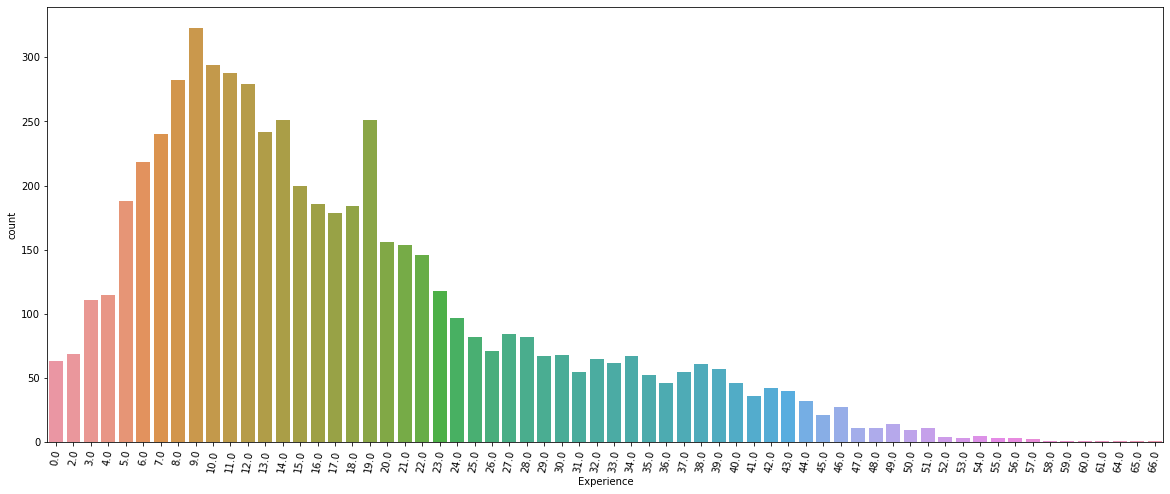

9.0     323
10.0    294
11.0    288
8.0     282
12.0    279
       ... 
65.0      1
59.0      1
61.0      1
58.0      1
66.0      1
Name: Experience, Length: 64, dtype: int64


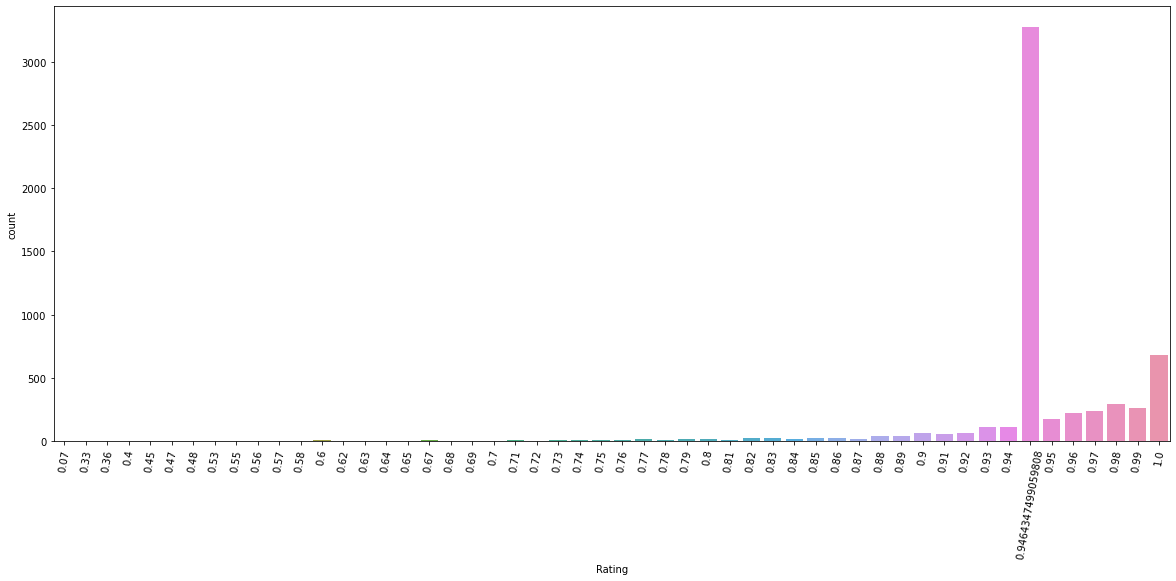

0.946435    3276
1.000000     684
0.980000     290
0.990000     259
0.970000     241
0.960000     220
0.950000     178
0.940000     115
0.930000     109
0.920000      66
0.900000      66
0.910000      60
0.890000      42
0.880000      41
0.850000      27
0.820000      23
0.830000      21
0.860000      21
0.800000      19
0.770000      16
0.870000      14
0.840000      13
0.790000      13
0.810000      12
0.670000      12
0.760000       9
0.710000       9
0.730000       8
0.750000       8
0.740000       7
0.600000       7
0.780000       6
0.560000       5
0.680000       5
0.700000       4
0.690000       4
0.570000       3
0.720000       3
0.550000       2
0.630000       2
0.640000       2
0.330000       2
0.620000       2
0.480000       1
0.530000       1
0.450000       1
0.360000       1
0.580000       1
0.070000       1
0.400000       1
0.650000       1
0.470000       1
Name: Rating, dtype: int64


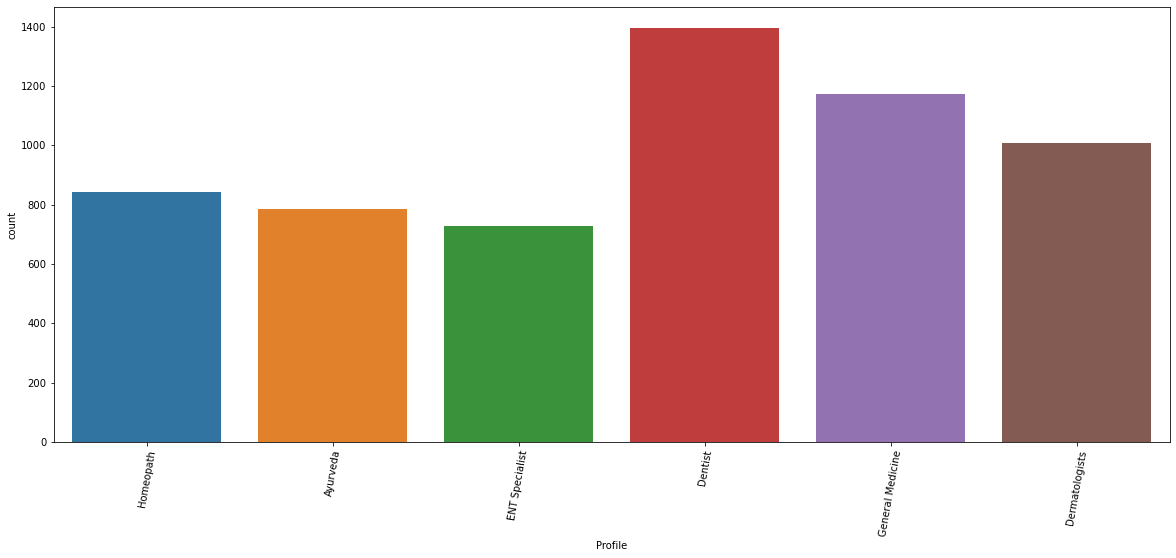

Dentist             1396
General Medicine    1173
Dermatologists      1009
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


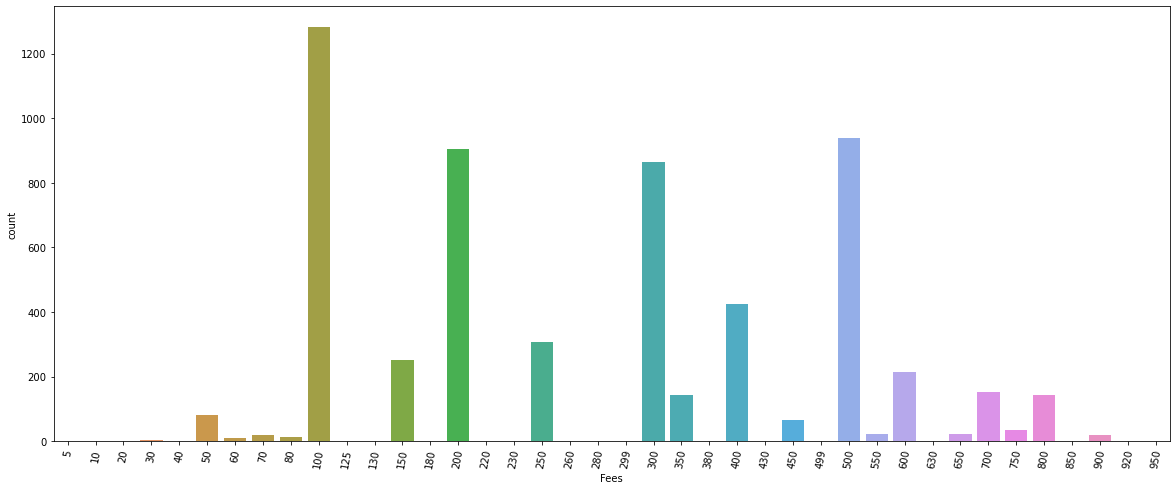

100    1282
500     938
200     904
300     864
400     424
250     306
150     252
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64


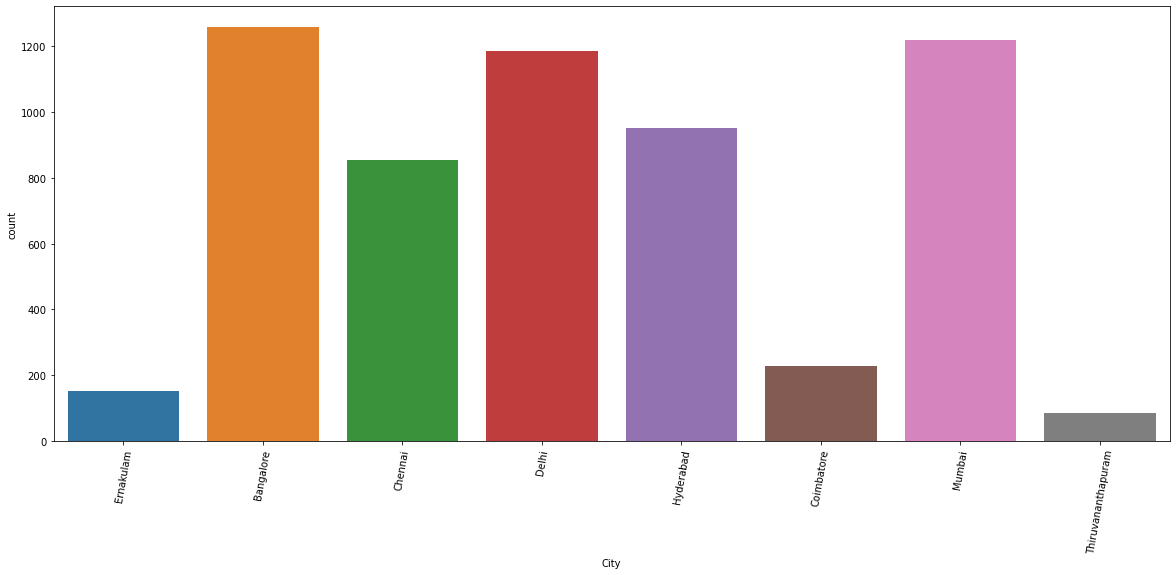

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Name: City, dtype: int64


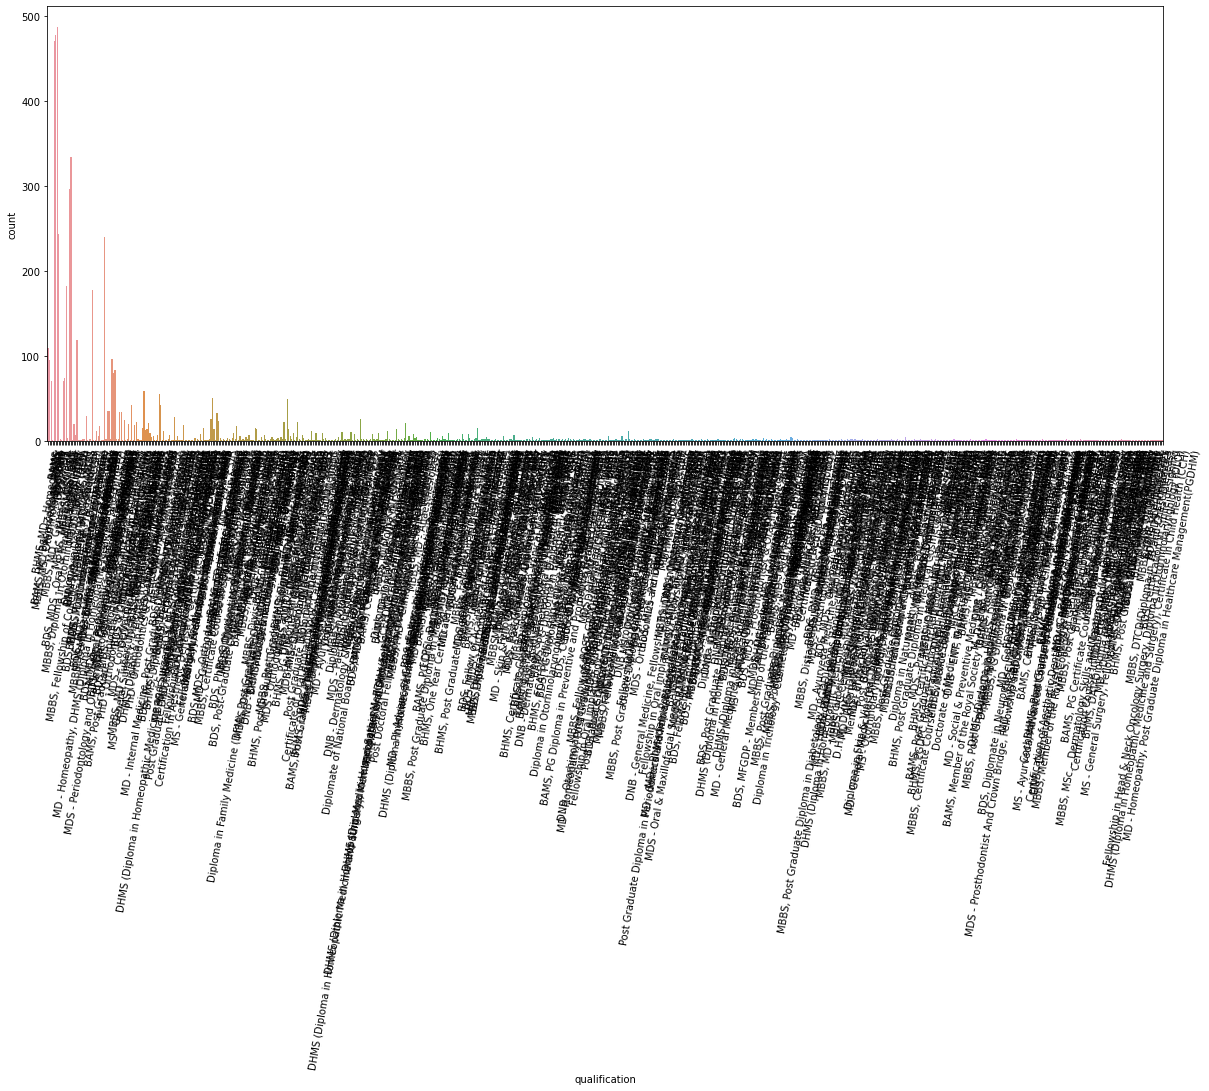

BDS                                                           487
BHMS                                                          477
BAMS                                                          471
MBBS                                                          334
MBBS, MS - ENT                                                297
                                                             ... 
BDS, MSc - Master of Oral Implantology (MOI)                    1
MBBS, Distance Fellowship in Diabetes Management                1
BDS, Post Graduate Diploma in Advanced Implantology             1
MBBS, DM - Gastroenterology                                     1
MS - General Surgery, Fellowship in Minimal Access Surgery      1
Name: qualification, Length: 733, dtype: int64


In [35]:
for col in df.columns:
    plt.subplots(figsize=(20,8))
    sn.countplot(x=col,data=df)
    plt.xticks(rotation=80)
    plt.show()
    print(df[col].value_counts())

    -Most of the doctors have an experience of around 9 years
    -The most practised profile is of a Dentist
    -Delhi,Mumbai,Bangalore have the highest number of doctors

In [36]:
#Encoding all the categorical data
from sklearn.preprocessing import LabelEncoder
l=['City','Profile','qualification']
for i in l:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])
df.head()

,Experience,Rating,Profile,Fees,City,qualification
0,24.0,1.000000,5,100,4,239
1,12.0,0.980000,0,350,0,55
2,9.0,0.946435,3,300,0,548
3,12.0,0.946435,0,250,0,278
4,20.0,1.000000,0,250,1,7


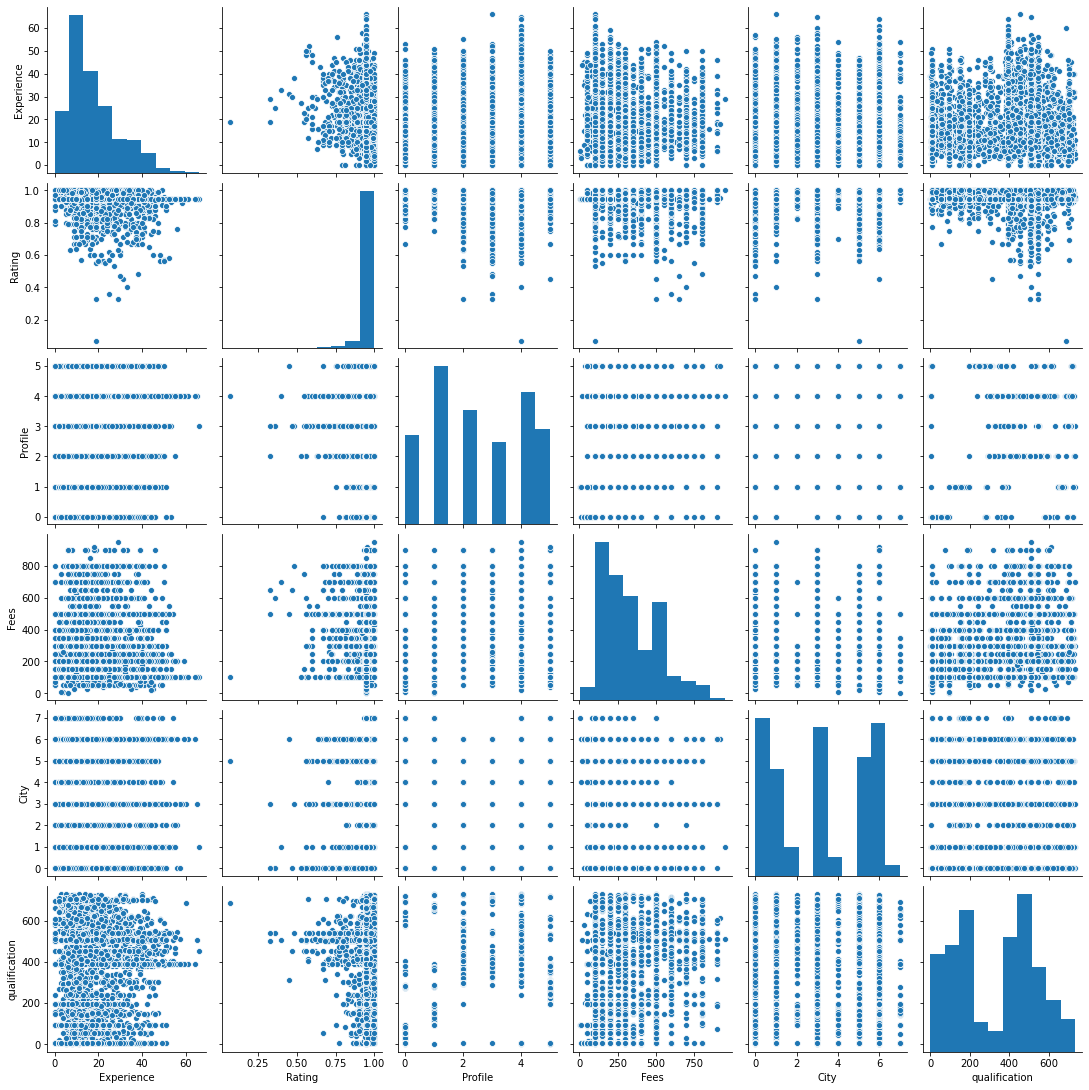

In [37]:
sn.pairplot(df)
plt.show()

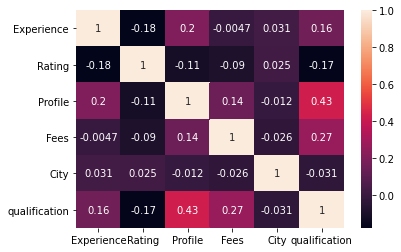

In [38]:
#Checking correlation
corr=df.corr()
sn.heatmap(corr,annot=True)
plt.show()

    Experience has a very low correlation with the target variable

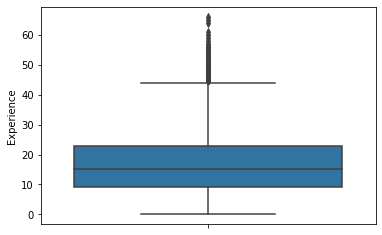

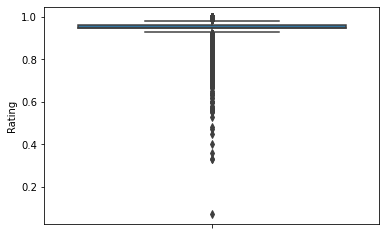

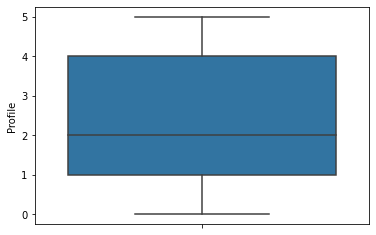

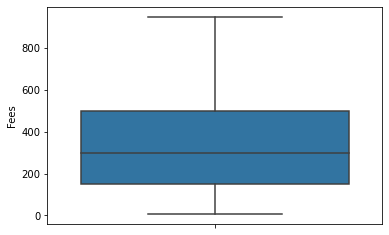

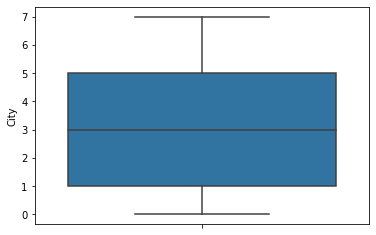

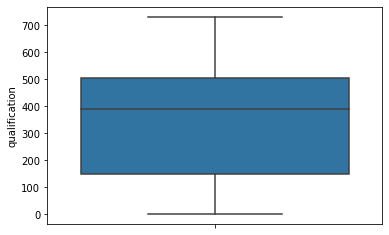

In [39]:
for col in df.describe().columns:
    sn.boxplot(df[col],orient='v')
    plt.show()

    Rating has a high value of outliers

In [40]:
df.skew()

Experience       1.000495
Rating          -4.895516
Profile          0.105024
Fees             0.747349
City            -0.004069
qualification   -0.050222
dtype: float64

In [41]:
#Dropping experience and rating due to low correlation, high skewness and large number of outliers
df=df.drop(['Experience','Rating'],axis=1)

In [42]:
#Removing outliers
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
df1.shape, df.shape

((5915, 4), (5935, 4))

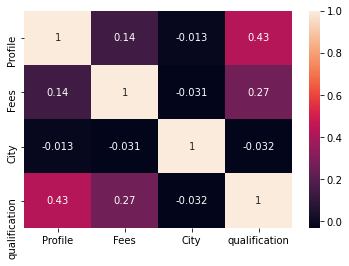

In [43]:
corr=df1.corr()
sn.heatmap(corr,annot=True)
plt.show()

In [44]:
df1.skew()

Profile          0.107302
Fees             0.709352
City            -0.002461
qualification   -0.047451
dtype: float64

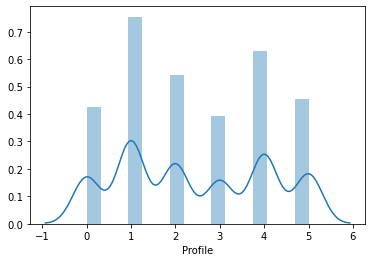

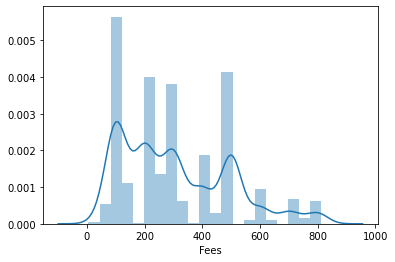

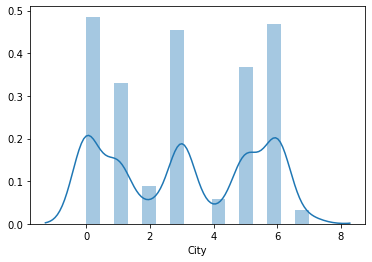

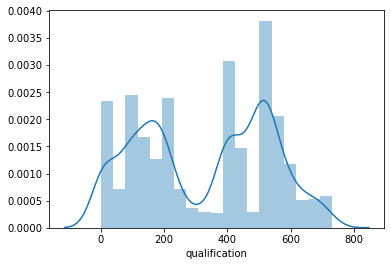

In [45]:
for col in df1.describe().columns:
    sn.distplot(df1[col])
    plt.show()

In [46]:
from scipy.stats import boxcox
df1['Fees']=boxcox(df1['Fees'], 0)

In [47]:
x=df1.drop(['Fees'],axis=1)
y=df1['Fees']

In [48]:
#Removing skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [49]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sx=sc.fit_transform(x)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

In [51]:
best_rstate=0
accu=0
for i in range(0,1000):
    train_x,test_x,train_y,test_y=train_test_split(sx,y,test_size=0.25,random_state=i)
    lg=LinearRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    temp_acc=r2_score(test_y,pred)
    if temp_acc>accu:
        accu=temp_acc
        best_rstate=i

print(f'Best accuracy {accu*100} found on random_state {best_rstate}')

Best accuracy 10.591784910870283 found on random_state 27


In [52]:
train_x,test_x,train_y,test_y=train_test_split(sx,y,test_size=0.25,random_state=27)

models=[LinearRegression(),SVR(),SVR(kernel='linear'),SVR(kernel='poly'),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),ExtraTreesRegressor()]
for m in models:
    m.fit(train_x,train_y)
    predm=m.predict(test_x)
    print(m)
    print('r2_score', r2_score(test_y,predm)*100)
    print('MAE:',mean_absolute_error(test_y,predm))
    print('MSE:',mean_squared_error(test_y,predm))
    print('RMSE:',np.sqrt(mean_squared_error(test_y,predm)))
    print('\n')

LinearRegression()
r2_score 10.591784910870283
MAE: 0.5252538263220596
MSE: 0.41105886692873467
RMSE: 0.6411387267422977


SVR()
r2_score 13.82060287798701
MAE: 0.48772725682044615
MSE: 0.3962142102743205
RMSE: 0.6294554871270251


SVR(kernel='linear')
r2_score 8.830037821137315
MAE: 0.5215407050714711
MSE: 0.41915858977633547
RMSE: 0.6474245823077275


SVR(kernel='poly')
r2_score 12.192792297113597
MAE: 0.5133457599861787
MSE: 0.40369815313439644
RMSE: 0.6353724522942401


RandomForestRegressor()
r2_score 13.436549394686937
MAE: 0.49902304914280515
MSE: 0.3979799159147696
RMSE: 0.6308564939150342


AdaBoostRegressor()
r2_score 12.601968611752401
MAE: 0.5204370844149756
MSE: 0.40181694398485884
RMSE: 0.6338903248866155


GradientBoostingRegressor()
r2_score 21.704358171324678
MAE: 0.4802100645929442
MSE: 0.3599682398700103
RMSE: 0.599973532641241


BaggingRegressor()
r2_score 11.7384897074158
MAE: 0.5038502540768673
MSE: 0.4057868326542572
RMSE: 0.6370139972200431


ExtraTreesRegressor

In [53]:
from sklearn.linear_model import Lasso
para={'alpha':[.0001,.001,.01,.1,1], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,para)
clf.fit(train_x,train_y)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [54]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(train_x,train_y)
pred_ls=ls.predict(test_x)
r2=r2_score(test_y,pred_ls)
print('r2 score',r2*100)

r2 score 10.296368825160274


In [55]:
from sklearn.linear_model import Ridge
para={'alpha':[.0001,.001,.01,.1,1], 'random_state':list(range(0,10)),'copy_X':[True,False],'fit_intercept':[True,False],'normalize':[True,False]}
rd=Ridge()
clf=GridSearchCV(rd,para)
clf.fit(train_x,train_y)
print(clf.best_params_)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0}


In [56]:
rd=Ridge(alpha=0.001,copy_X=True,fit_intercept=True,normalize=True,random_state=0)
rd.fit(train_x,train_y)
pred_rd=rd.predict(test_x)
r2score=r2_score(test_y,pred_rd)
print('r2 score',r2score*100)

r2 score 10.587348034296918


In [57]:
parameter={'n_estimators':[50,100,150,200,250],
           'max_features':['auto','sqrt','log2'],
          'random_state':list(range(0,42))}

In [58]:
#Hypertuning
gcv=GridSearchCV(GradientBoostingRegressor(),parameter,scoring='r2')
gcv.fit(train_x,train_y)
gcv.best_estimator_
gcv_pred=gcv.best_estimator_.predict(test_x)
print('r2_score', r2_score(test_y,gcv_pred))

r2_score 0.22228922777902071


In [59]:
import pickle
file='doctor_fees.pkl'
pickle.dump(gcv,open(file,'wb'))